In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [268]:
Train_data=pd.read_csv('train.csv')
Test_data=pd.read_csv('test.csv')

In [269]:
print(Train_data.shape,Test_data.shape)

(891, 12) (418, 11)


In [270]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [271]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [272]:
Train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [273]:
train_data=Train_data.drop(['Name','Ticket','Cabin'],axis=1)
test_data=Test_data.drop(['Name','Ticket','Cabin'],axis=1)
train_data.shape

(891, 9)

In [274]:
corr_matrix = train_data.corr()

<ipython-input-274-55747bfcff15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


In [275]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<Axes: >

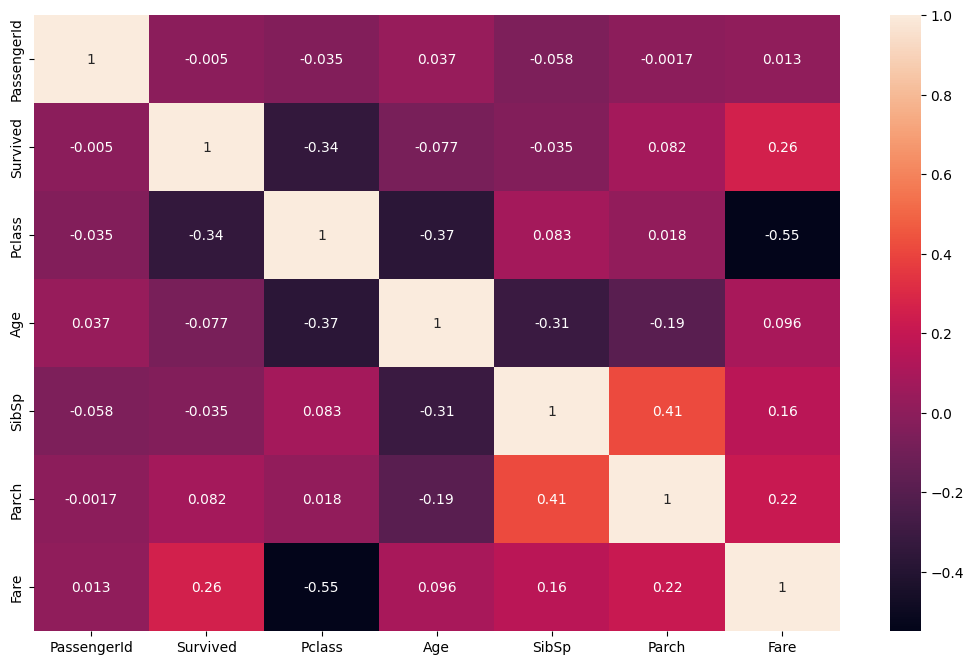

In [276]:
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix,yticklabels=True,cbar=True,annot=True)

In [277]:
x_train = train_data.drop('Survived',1)
y_train=train_data['Survived']

<ipython-input-277-9a2382b4c6a3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = train_data.drop('Survived',1)


In [278]:
x_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


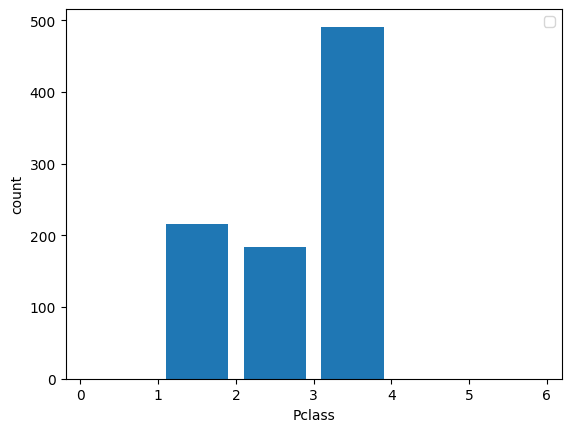

In [279]:
bins=[0,1,2,3,4,5,6]
plt.hist(x_train.Pclass,bins,histtype='bar',rwidth=0.8)
plt.legend()
plt.xlabel('Pclass')
plt.ylabel('count')

plt.show()

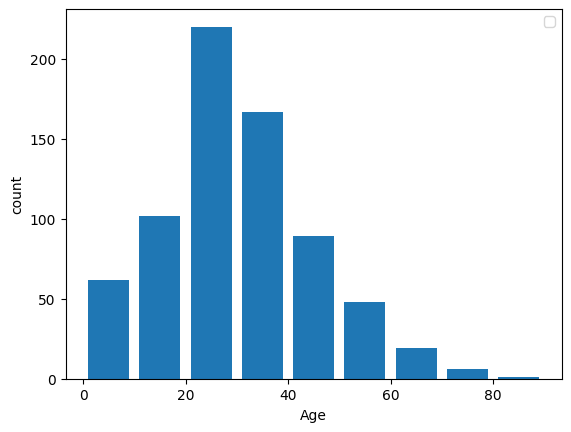

In [280]:
bins=[0,10,20,30,40,50,60,70,80,90]
plt.hist(x_train.Age,bins,histtype='bar',rwidth=0.8)
plt.legend()
plt.xlabel('Age')
plt.ylabel('count')

plt.show()

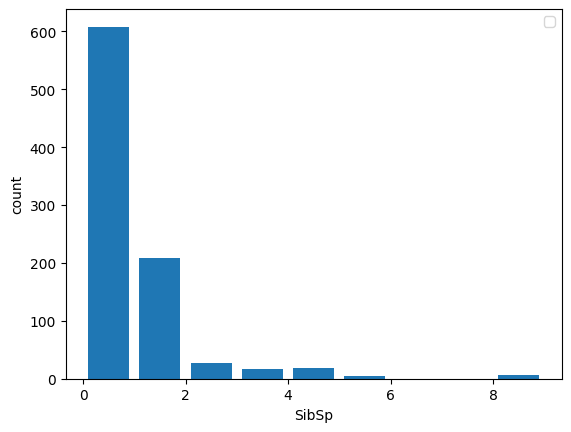

In [281]:
bins=[0,1,2,3,4,5,6,7,8,9]
plt.hist(x_train.SibSp,bins,histtype='bar',rwidth=0.8)
plt.legend()
plt.xlabel('SibSp')
plt.ylabel('count')

plt.show()

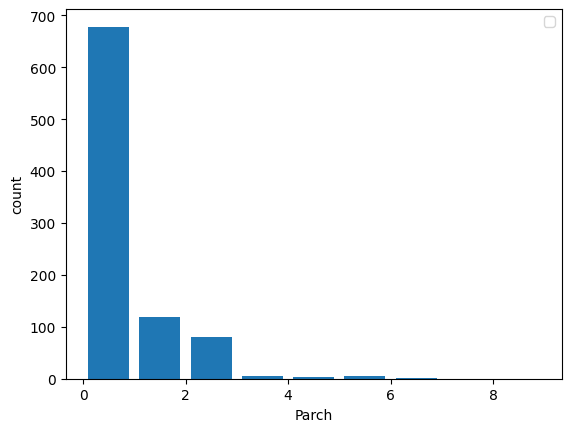

In [282]:
bins=[0,1,2,3,4,5,6,7,8,9]
plt.hist(x_train.Parch,bins,histtype='bar',rwidth=0.8)
plt.legend()
plt.xlabel('Parch')
plt.ylabel('count')

plt.show()

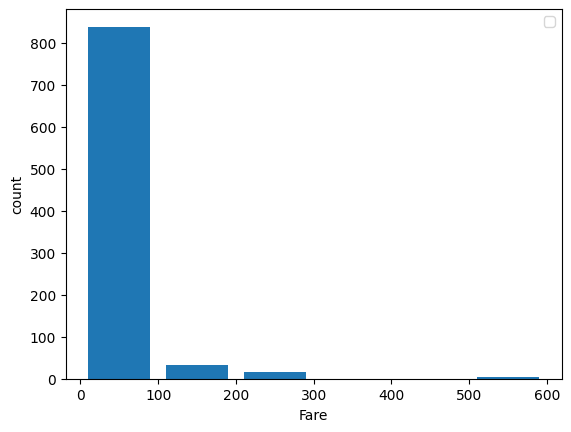

In [283]:
bins=[0,100,200,300,400,500,600]
plt.hist(x_train.Fare,bins,histtype='bar',rwidth=0.8)
plt.legend()
plt.xlabel('Fare')
plt.ylabel('count')

plt.show()

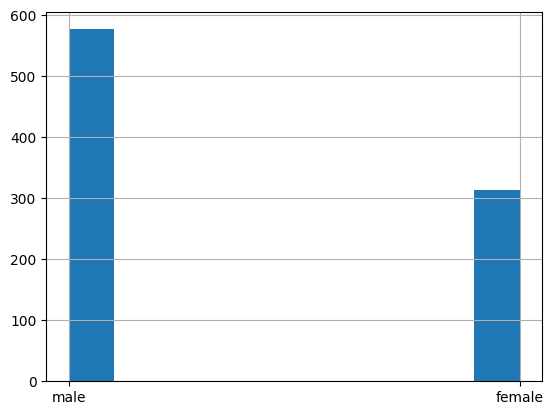

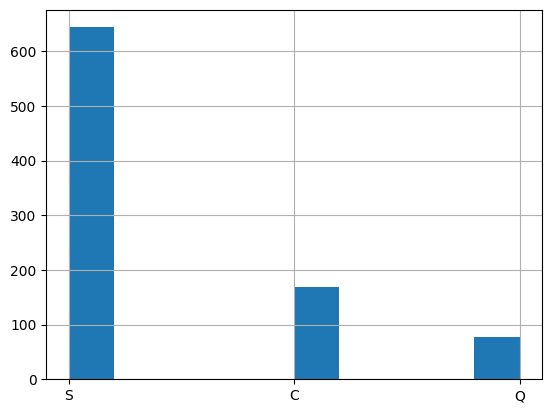

In [284]:
for col in x_train.select_dtypes(include=['object']):
    plt.figure()
    x_train[col].hist()
    plt.show()

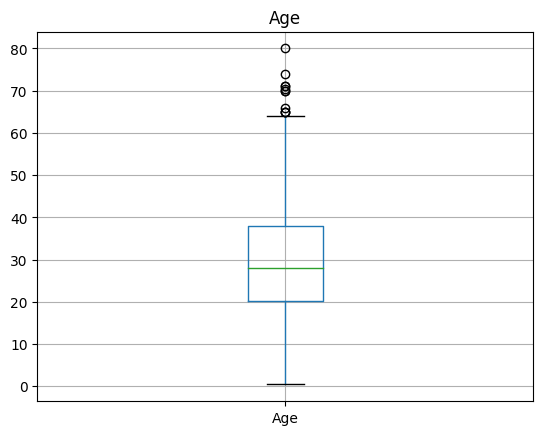

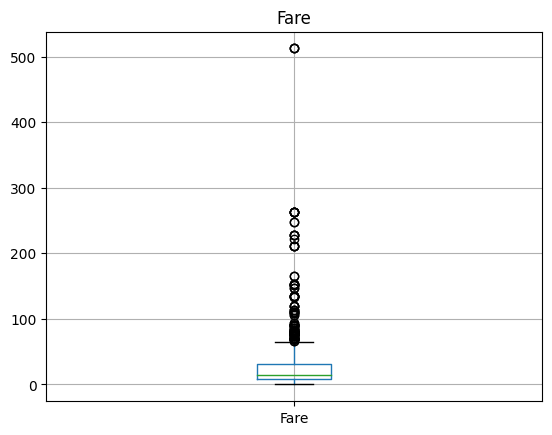

In [285]:
for col in x_train.select_dtypes(include=['float64']):
    plt.figure()
    x_train.boxplot([col])
    plt.title(col)

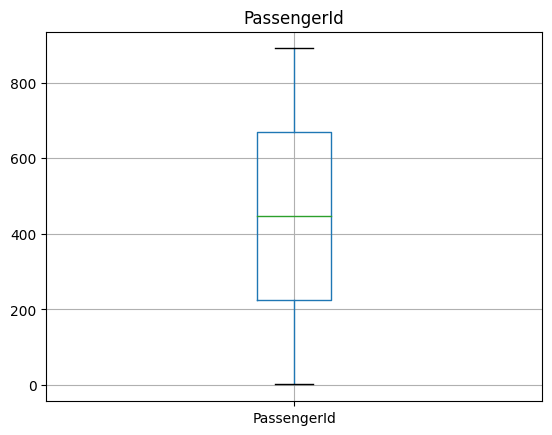

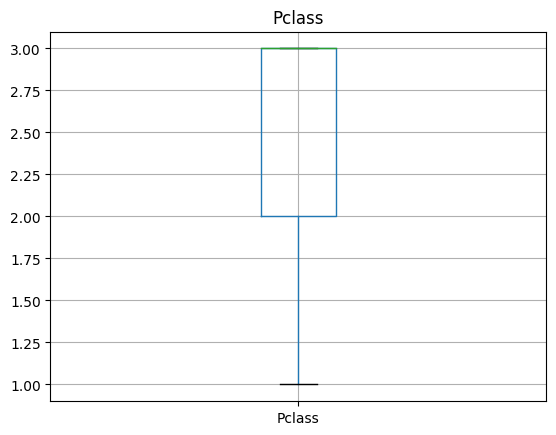

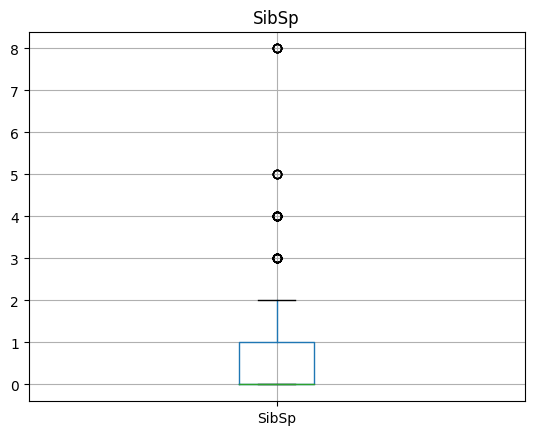

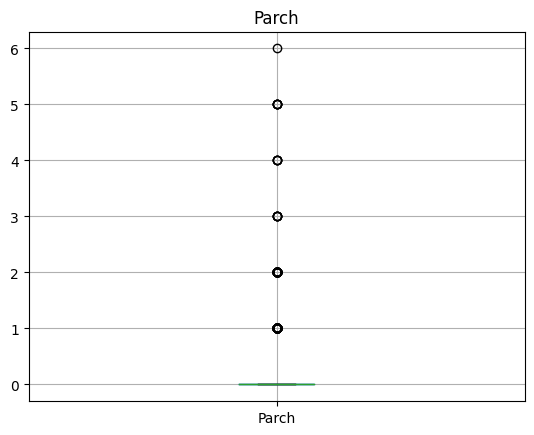

In [286]:
for col in x_train.select_dtypes(include=['int64']):
    plt.figure()
    x_train.boxplot([col])
    plt.title(col)

In [287]:
from sklearn.compose import make_column_selector as selector

numerical_column_selector = selector(dtype_exclude=object)

numerical_features=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features=['Sex','Embarked']

In [288]:
numerical_features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [289]:
categorical_features

['Sex', 'Embarked']

# **Data Preprocessing**

In [290]:
from numpy.ma.extras import median
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,Normalizer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import hinge_loss

from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV

numeric_transformer = Pipeline([('si',SimpleImputer(missing_values= np.nan ,strategy='median')),('ss',StandardScaler())])
categorical_transformer=Pipeline([('si',SimpleImputer(missing_values=np.nan,strategy='most_frequent')),('oe',OneHotEncoder())])
p=ColumnTransformer(transformers=[('num',numeric_transformer,numerical_features),('cat',categorical_transformer,categorical_features)])

In [291]:
from sklearn import set_config
set_config(display='diagram')
Final = Pipeline([('ct', p)])
Final

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked'])]))])

In [292]:
x_train=p.fit_transform(x_train)
x_test=p.fit_transform(test_data)

In [293]:
print(x_train.shape,y_train.shape)
print(x_test.shape)

(891, 11) (891,)
(418, 11)


In [294]:
train_feature,test_feature,train_label,test_label = train_test_split(x_train, y_train, test_size=0.25)

# **Dummmy Classifier**

In [295]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron

base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(train_feature ,train_label)

print('Training accuracy : {0:.4f}'.format(base_clf.score(train_feature ,train_label)))

Training accuracy : 0.6063


# **Perceptron**

In [296]:
bin_clf = Perceptron(max_iter=100,random_state=1729)

In [297]:
bin_clf.fit(train_feature, train_label)

print('Dimension of Weights : {0}'.format(bin_clf.coef_.shape))
print('Bias : {0}'.format(bin_clf.intercept_))
print('Loss function : {0}'.format(bin_clf.loss_function_))

Dimension of Weights : (1, 11)
Bias : [1.]
Loss function : <sklearn.linear_model._sgd_fast.Hinge object at 0x7bda57901150>


In [298]:
y_pred_train = bin_clf.predict(train_feature)
print('Training Accuracy :', bin_clf.score(train_feature ,train_label))

y_pred_test = bin_clf.predict(test_feature)
print('Testing Accuracy :', bin_clf.score(test_feature ,test_label))

Training Accuracy : 0.7455089820359282
Testing Accuracy : 0.7802690582959642


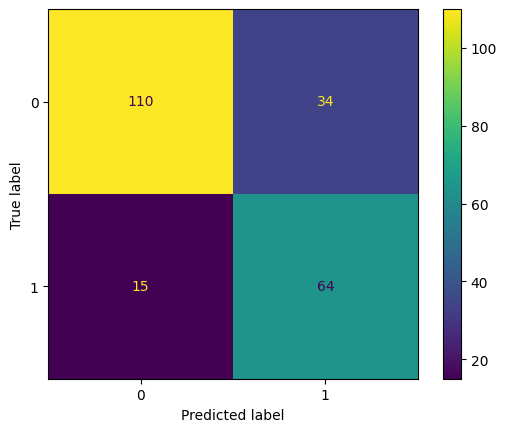

In [299]:
cm_display = ConfusionMatrixDisplay.from_predictions(
    test_label, y_pred_test, values_format='.5g', display_labels=bin_clf.classes_)
plt.show()

In [177]:
cf_matrix = cm_display.confusion_matrix

tn = cf_matrix[0,0]
fn = cf_matrix[1,0]
fp = cf_matrix[0,1]
tp = cf_matrix[1,1]

precision = tp/(tp+fp)
print('Precision : ', precision)

recall = tp/(tp+fn)
print('Recall : ', recall)

accuracy = (tn+tp)/(tn+tp+fn+fp)
print('Accuracy : ', accuracy)

Precision :  0.6346153846153846
Recall :  0.7674418604651163
Accuracy :  0.7399103139013453


# **KNN**

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf=KNeighborsClassifier()

### HPT using GridSeachCV

In [301]:
param_grid = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}
knn_clf_gs=GridSearchCV(knn_clf,param_grid,scoring='accuracy')
knn_clf_gs.fit(train_feature,train_label)

print('Best parameter: ',knn_clf_gs.best_params_)


Best parameter:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [302]:
knn_training_accracy = knn_clf_gs.best_score_
print('Accuracy on train data:', knn_training_accracy)

Accuracy on train data: 0.8068791381438671


In [303]:
y_pred_test = knn_clf_gs.best_estimator_.predict(test_feature)
knn_testing_accracy = accuracy_score(test_label,y_pred_test)
print('Accuracy on test data:', knn_testing_accracy)

Accuracy on test data: 0.8295964125560538


## **Decision Tree Classifier**

In [304]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
dt_clf=DecisionTreeClassifier(max_depth= 5, min_samples_split= 10,random_state=42)
dt_clf.fit(train_feature,train_label)
y_pred=dt_clf.predict(train_feature)
score_dt_clf = accuracy_score(train_label,y_pred)
print('Accuracy on train data',score_dt_clf)

Accuracy on train data 0.8562874251497006


### HPT using GridSearchCV

In [306]:
dt_clf=DecisionTreeClassifier()
param_grid={"max_depth" : [5, 10, 15, 20],
    "criterion" : ["gini", "entropy", "log_loss"],
    }

dt_clf_gs=GridSearchCV(dt_clf,param_grid,scoring='accuracy')
dt_clf_gs.fit(train_feature,train_label)

print('Best parameter: ',dt_clf_gs.best_params_)

Best parameter:  {'criterion': 'gini', 'max_depth': 5}


In [308]:
dt_train_accuracy = dt_clf_gs.best_score_
print('Accuracy on train data:', dt_train_accuracy)

Accuracy on train data: 0.8248681405005049


In [309]:
y_pred_test = dt_clf_gs.best_estimator_.predict(test_feature)
dt_test_accracy = accuracy_score(test_label,y_pred_test)
print('Accuracy on test data:', dt_test_accracy)

Accuracy on test data: 0.7847533632286996


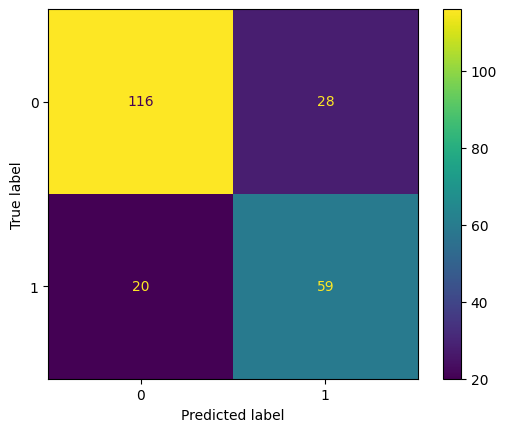

In [310]:
ConfusionMatrixDisplay.from_estimator(dt_clf_gs.best_estimator_,test_feature,test_label)

# **Random Forest**

In [311]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
rf_clf = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=42)
rf_clf.fit(train_feature,train_label)
y_pred=rf_clf.predict(train_feature)
score_rf_clf = accuracy_score(train_label,y_pred)
print('Accuracy on train data',score_rf_clf)

Accuracy on train data 0.8488023952095808


## Hyperparameter Tuning

In [313]:
rf=RandomForestClassifier(random_state=42)

param_grid={'max_depth':[2,3,5,10,20],
            'min_samples_leaf':[5,10,20,50,100,200],
            }
rf_clf_gs = GridSearchCV(estimator=rf,param_grid=param_grid,cv=4,
                         n_jobs=-1,scoring='accuracy')

rf_clf_gs.fit(train_feature,train_label)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
             scoring='accuracy')

In [314]:
rf_clf_gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 5}

In [315]:
rf_train_accracy = rf_clf_gs.best_score_
print('Accuracy on train data:', dt_train_accuracy)

Accuracy on train data: 0.8248681405005049


In [316]:
y_pred_test = rf_clf_gs.best_estimator_.predict(test_feature)
rf_test_accracy = accuracy_score(test_label,y_pred_test)
print('Accuracy on test data:', dt_test_accracy)

Accuracy on test data: 0.7847533632286996


## **AdaBoost**

In [317]:
from sklearn.ensemble import AdaBoostClassifier

In [318]:
ada_clf=AdaBoostClassifier(random_state=42)
param_grid={
            'n_estimators': [10,25,30,50,100,200]
            }
ada_clf_gs=GridSearchCV(estimator=ada_clf,param_grid=param_grid,scoring='accuracy')
ada_clf_gs.fit(train_feature,train_label)

GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
             param_grid={'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy')

In [319]:
ada_clf_gs.best_params_

{'n_estimators': 50}

In [321]:
ada_train_accuracy = ada_clf_gs.best_score_
print('Accuracy on train data:', ada_train_accuracy)

Accuracy on train data: 0.7994388957468297


In [322]:
y_pred_test = ada_clf_gs.best_estimator_.predict(test_feature)
ada_test_accuracy = accuracy_score(test_label,y_pred_test)
print('Accuracy on test data:', dt_test_accracy)

Accuracy on test data: 0.7847533632286996


# **logistic Regression**

In [323]:
from sklearn.linear_model import LogisticRegression

In [324]:
lr_clf= LogisticRegression(solver='liblinear')
lr_clf.fit(train_feature,train_label)
y_pred=lr_clf.predict(train_feature)
score_lr_clf = accuracy_score(train_label,y_pred)
print('Accuracy on train data',score_lr_clf)

Accuracy on train data 0.7904191616766467


## HyperParameter Tuning

In [325]:
param_grid=[{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

lr_clf_gs = GridSearchCV(estimator=lr_clf,param_grid=param_grid,
                         scoring="accuracy",cv=10)
lr_clf_gs.fit(train_feature,train_label)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [326]:
lr_clf_gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [328]:
ada_train_accuracy = lr_clf_gs.best_score_
print('Accuracy on train data:', dt_train_accuracy)

Accuracy on train data: 0.8248681405005049


In [330]:
y_pred_test = lr_clf_gs.best_estimator_.predict(test_feature)
ada_test_accuracy = accuracy_score(test_label,y_pred_test)
print('Accuracy on test data:', ada_test_accuracy)

Accuracy on test data: 0.820627802690583


## **SVM**

In [331]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [332]:
svm_clf = SVC()
svm_clf.fit(train_feature,train_label)
accuracies = cross_val_score(svm_clf,train_feature,train_label,cv=5)

print("Train Score:", np.mean(accuracies))

Train Score: 0.8204017506452699


## **HyperParameter Tuning**

In [333]:
param_grid={'C':[0.01,0.1,1,10],
            'kernel' : ["linear","poly","rbf","sigmoid"],
            'degree' : [1,3,5,7],'gamma' : [0.01,1]}
svm_clf_gs=GridSearchCV(svm_clf,param_grid,cv=5)
svm_clf_gs.fit(train_feature,train_label)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [334]:
svm_clf_gs.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [335]:
svm_train_accuracy = svm_clf_gs.best_score_
print('Accuracy on train data:', dt_train_accuracy)

Accuracy on train data: 0.8248681405005049


In [337]:
y_pred_test = svm_clf_gs.best_estimator_.predict(test_feature)
svm_test_accuracy = accuracy_score(test_label,y_pred_test)
print('Accuracy on test data:', svm_test_accuracy)

Accuracy on test data: 0.8385650224215246


# **Test Data Prediction**

In [338]:
ypred = ada_clf_gs.best_estimator_.predict(x_test)
ypred = ypred.astype(bool)

In [339]:
submission=pd.DataFrame(columns=['id', 'Survived'])
submission['id']=[i for i in range(len(ypred))]
submission["Survived"]=[i for i in ypred]
submission.to_csv('submission.csv',index=False)